<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220502_ml_05_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 15.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4dfcd338c28404f4d9343a02e1641cd693e035e37523c1d5f7d69eec7efd6e3f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Random  Forest

#### 앙상블 학습(Ensemble Learning)

- 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

- 머신러닝에는 이런 종류의 모델이 많지만, 랜덤 포레스트random forest와 그래디언트 부스팅(gradient boosting) 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용 <br>
(두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터 셋에서 효과적이라고 입증)


앙상블 학습을 통한 분류기

- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법

앙상블 학습의 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)

- 보팅(Voting) : 서로 다른 알고리즘을 가진 분류기를 결합 / 데이터는 같은 것으로

- 배깅(Bagging) : 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행

- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행

- 스태킹(Stacking) : 양상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련하여 진행

- 예측을 입력으로 받아 최종 예측하는 예측기를 블렌더(blender) 또는 메타학습기(meta learner)이라고 함

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png" alt="보팅과 배깅" width="60%" />

</center>

보팅 유형 - 하드 보팅(Hard Voting)(다수값) 과 소프트 보팅(Soft Voting)(확률값)

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbBEckS%2Fbtqy1I6b5Nk%2FH9U9w6fVBCvsY8PX8F2Zok%2Fimg.png" alt="보팅 유형" width="60%" />

</center>

#### 보팅 분류기(Voting Classifier)

[VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [7]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=8)
model_tree = DecisionTreeClassifier(max_depth=4, random_state = 0)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
model_voting = VotingClassifier(estimators=[('lr', model_lr),
                                            ('knn', model_knn),
                                            ('tree', model_tree)],
                                voting = 'soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=0)

# 보팅 분류기의 학습/예측/평가
model_voting.fit(X_train, y_train)
model_voting.score(X_train, y_train), model_voting.score(X_test, y_test)

(0.9758241758241758, 0.956140350877193)

In [11]:
model_voting.estimators_

[LogisticRegression(),
 KNeighborsClassifier(n_neighbors=8),
 DecisionTreeClassifier(max_depth=4, random_state=0)]

In [15]:
# 선형회귀에서 클래스의 이름을 가지고 오고 싶을때 , __class__ : 클래스를 가져오고
#__name__ : 이름을 String 형태로 가져옴
model_lr.__class__.__name__

'LogisticRegression'

In [16]:
# 개별 모델의 학습/예측/평가
for m in [model_lr, model_knn, model_tree] :
    m.fit(X_train, y_train)
    print(m.__class__.__name__, 
          m.score(X_train, y_train), m.score(X_test, y_test))

LogisticRegression 0.9494505494505494 0.9473684210526315
KNeighborsClassifier 0.9384615384615385 0.9473684210526315
DecisionTreeClassifier 0.9846153846153847 0.956140350877193


- 보팅 분류기의 정확도가 각 개별 모델의 정확도보다 조금 높게 나타남
- 여러 알고리즘을 결합한다고 항상 성능이 향상되는 것은 아님

#### 랜덤 포레스트

- 결정트리의 단점 : 과적합 문제

- 현재의 랜덤포레스트 개념은 2001년 레오 브레이먼에 의해 만들어짐

- 분류 및 회귀 분석에 사용되는 앙상블 학습 방법의 일종으로 훈련 과정에서 구성한 다수의 결정 트리(Forest)들을 임의적(Random)으로 학습하여 분류 또는 평균 예측(회귀 분석)를 출력

- 다수의 결정트리를 구성하는 학습단계와 입력 벡터가 들어왔을 때 분류하거나 예측하는 테스트 단계로 구성

- 각각의 트리가 독립적으로 학습하므로 학습 과정을 병렬화할 수 있음

- 일반적으로 (의사)결정트리보다 성능이 좋으며 (Tree Correlation 문제 해결) 파라미터 수가 적어 튜닝도 비교적 간단함

 - Tree Correlation 문제 : 특정 feature가 정답에 많은 영향을 줄 때 모든 tree들이 비슷한 결과를 도출하는 문제 -> 특성 자체도 랜덤하게 사용해줌

- 타킷 예측을 잘하고 구별되는 어러 개의 트리를 만들기 위해 무작위성을 부여
 - 배깅(Bagging)의 대표적인 알고리즘

- 랜덤 트리 생성 방법

  (1) 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법 : 샘플을 무작위
  
  (2) 분할 테스트에서 특성을 무작위로 선택하는 방법 : 컬럼을 무작위

#### 랜덤 포레스트 만들기

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 함 <br>
 (RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수)


1. 트리를 만들기 위해 먼저 데이터의 부트스트랩(중복허용) 샘플bootstrap sample을 생성

 - n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출

 - 부스스트랩 샘플의 예 ( [‘a’, ‘b’, ‘c’, ‘d’]에서 부트스트랩 샘플을 만든다고 하면)
  >  [‘b’, ‘d’, ‘d’, ‘c’] ,  [‘d’, ‘a’, ‘d’, ‘a’], [‘a’, ‘a’, ‘c’, ‘b’] 등

  - 배깅(Bagging)은 bootstrap aggregating의 줄임말로 통계학에서는 중복을 허용한 리샘플링(resampling)을 부트스트래핑(bootstrapping)이라고 함

2. 생성한 데이터셋으로 트리를 만듬

 - 전체 데이터셋 대상이 아닌 무작위로 선택한 데이터셋 중에서 최선의 데이터셋을 찾음
 - <font color=yellow>몇 개의 특성을 고를 지 선택 -> max_features</font>
 - <font color=yellow>몇 개의 트리를 만들 지 선택 -> n_estimators</font>
 -  max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 무작위로 선택한 특성의 임계값을 찾기만 하면 됨

 - max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰짐

 - max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됨

3. 모델에 있는 모든 트리의 예측을 만듬

 -  회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듬
 
 - 분류의 경우는 약한 투표 전략을 사용
  - 각 알고리즘은 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측하고, 
  - 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
```
RandomForestClassifier(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight)
```
- <font color=yellow>n_estimators : 숲의 나무의 수, 생성할 트리의 개수</font>
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- <font color=yellow>max_features : 각 노드에서 분할에 사용할 특징의 최대 수</font>
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- bootstrap : 부스트랩 사용 여부
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
- n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수
- random_state : 난수 seed 설정
- verbose : 실행 과정 출력 여부
- warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
- class_weight : 클래스 가중치

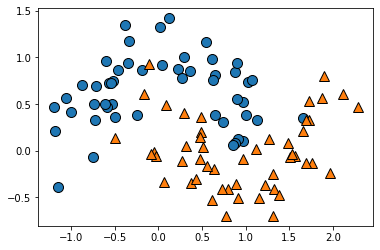

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [20]:
# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

- 랜덤 포레스트 안에 만들어진 트리는 estimator_ 속성에 저장



각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계 시각화

- 다섯 개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정 경계

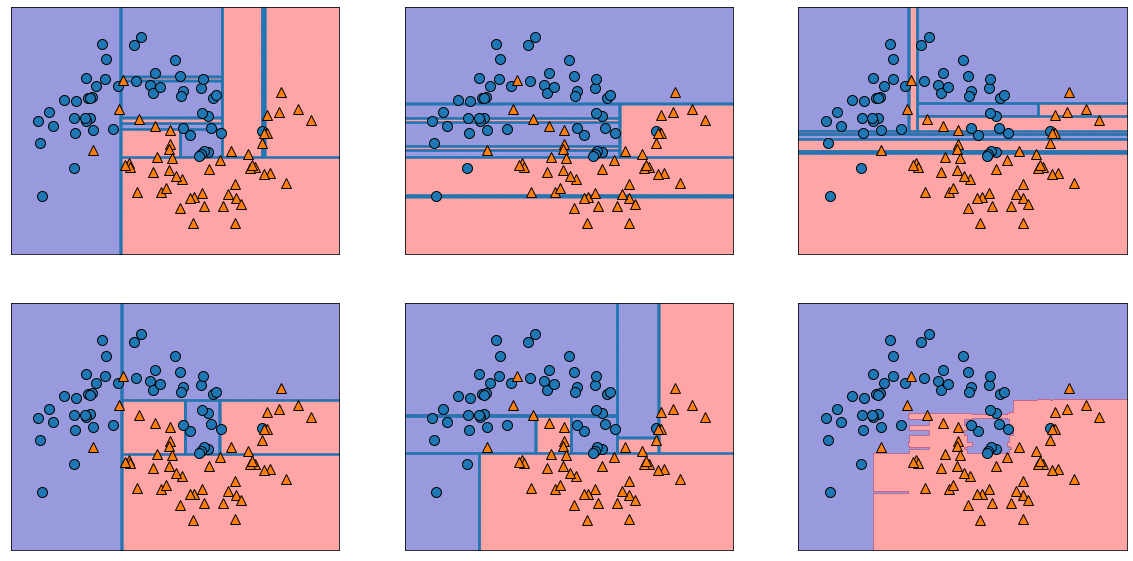

In [34]:
# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
# ravel() 다차원 배열(array)을 1차원 배열로 평평하게 NumPy의 함수
# reshape() 함수와 반대의 기능을 하는 함수
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for tree, ax in zip(model.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)


# 랜덤포레스트로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어줌
- 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에(수백, 수천 개) 더 부드러운 결정 경계가 만들어짐

#### Random Forest 실습 01

- 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용

In [64]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)

# 모델 학습 
# max_depth : 가지치기 
# max_feature : 크게 쓰면 다양하게 특성(컬럼)을 많이 사용함 -> 일반화가능
model = RandomForestClassifier(n_estimators=100, max_depth=6,
                               max_features=4, random_state=0)
model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9976525821596244, 0.972027972027972)

In [ ]:
(0.9953051643192489, 0.9440559440559441) 5
(0.9906103286384976, 0.951048951048951) 3

- 랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 정확도를 냄

- 단일 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있음

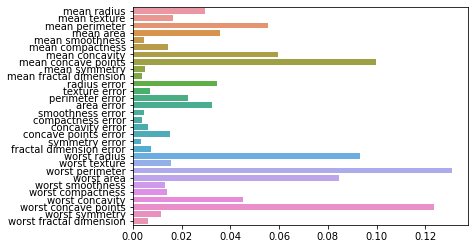

In [68]:
# 특성 중요도 시각화
import numpy as np
import seaborn as sns

sns.barplot( x= model.feature_importances_, y = cancer.feature_names )

- 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 가짐

- 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘

- 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음

#### Random Forest 실습 02

붓꽃 데이터 랜덤포레스트를 만들기

In [90]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, max_depth=2,
                               max_features=4, random_state=0)
model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9666666666666667, 0.9333333333333333)

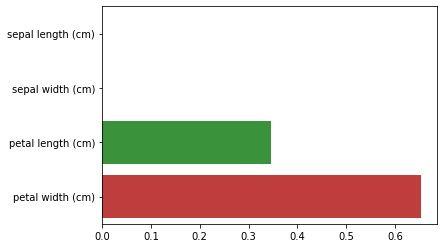

In [88]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot( x= model.feature_importances_, y = iris.feature_names )

##### 랜덤포레스트 성능향상

- iris 데이터가 간단하고 size가 작기 때문에 성능향상은 없으나 max_features와 oob_score를 적용해 보고 
- 특성 중요도의 변화를 확인해 본다.


oob_score

- 샘플링에 중복을 허용하는 배깅(Bagging) 방식을 사용하면 어떤 샘플은 여러번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있음
- 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링
- oob(out-of-bag) : 선택되지 않은 훈련 샘플의 나머지 37% <br>
(예측기 마다 남겨진 37%는 모두 다름)
- oob_score=True로 지정하면 훈련이 끝난 후 자동으로 oob 샘플을 사용해 평가를 수행 

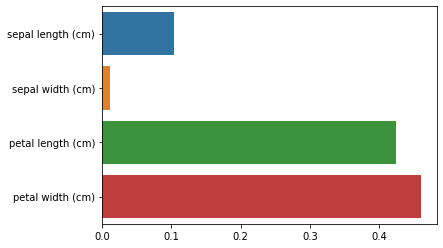

In [94]:
from pandas.core.common import random_state
# 모델 학습
model = RandomForestClassifier(n_estimators=100, max_depth=2,
                               max_features=2,
                               oob_score=True,
                               random_state=0)

model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test), model.oob_score_

# 결정함수는 각 훈련 샘플의 클래스 확률을 반환 
# (predict_proba()가 기반이 되는 예측기 모델에 존재하기 때문)
# "OOB 샘플의 결정 함수값:" 
len( model.oob_decision_function_ )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=iris.feature_names)

warm_start

- 랜덤 포레스트의 트리 개수(n_estimators)를 결정하는데 도움이 되는 매개변수
- warm_start=True로 지정하면 처음부터 시작하지 않고 트리를 앙상블에 추가

- warm_start 매개변수를 사용해 n_estimators에 따른 OOB 점수의 변화 그래프 확인이 가능

In [104]:
# warm_start 매개변수를 사용해 n_estimators에 따른 OOB 점수의 변화 그래프
sns.set() # 테마 초기화

start, end, step = 50, 500, 50

# OOB 점수를 담을 리스트
oob_scores = []
model = RandomForestClassifier(n_estimators=50, warm_start=True,
                               oob_score=True, n_jobs=1, 
                               random_state=0)

# 모델 훈련과 oob_scores_ 값을 리스트에 추가
model.fit(X_train, y_train)
oob_scores.append(model.oob_score_)

# 50부터 시작해서 트리 개수를 담을 리스트를 생성
est = start
estimators = [est]

# 50개씩 트리를 추가하는 반복문
n = end // start
for i in range(n):
  est += step
  estimators.append(est)
  model.set_params(n_estimators=est)
  model.fit(X_train, y_train)
  oob_scores.append(model.oob_score_)

In [105]:
 oob_scores

[0.9416666666666667,
 0.9416666666666667,
 0.95,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334]

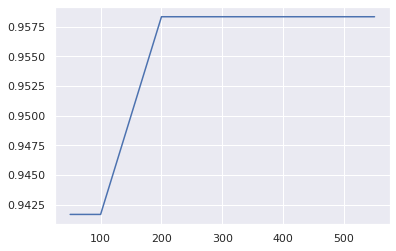

In [107]:
# 그래프 출력
plt.plot(estimators, oob_scores )

#### 장단점

- 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
- 트리가 여러 개 만들어지기 때문에 비전문가에게 예측과정을 보여주기는 어렵다.
- 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
- 텍스트 데이터와 같은 희소한 데이터에는 잘 동작하지 않는다.
- 큰 데이터 세트에도 잘 동작하지만 훈련과 예측이 상대적으로 느리다.
- 트리 개수가 많아질 수록 시간이 더 오래 걸린다.


# Bagging

- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 분류기가 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행

- 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier # 같은 모델을 데이터만 다르게 사용이 가능하다

# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model_lr = LogisticRegression(solver='liblinear')
model = BaggingClassifier( base_estimator= model_lr, n_estimators=100, n_jobs=1,
                          oob_score=True, random_state=0)
model.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
model.score(X_train, y_train), model.oob_score_, model.score(X_test, y_test)

(0.9624413145539906, 0.9483568075117371, 0.958041958041958)

In [112]:
model_lr = DecisionTreeClassifier(max_depth=6)
model = BaggingClassifier( base_estimator= model_lr, n_estimators=100, n_jobs=1,
                          max_features=8, oob_score=True, random_state=0)
model.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
model.score(X_train, y_train), model.oob_score_, model.score(X_test, y_test)

(0.9976525821596244, 0.9553990610328639, 0.986013986013986)

In [113]:
# 특성 중요도 시각화: 결정트리만 지원
import seaborn as sns
# model.feature_importances_ : 이건 안됨
model.estimators_[0].feature_importances_

array([0.71613819, 0.01536628, 0.00955032, 0.00121822, 0.03627758,
       0.10722385, 0.00828994, 0.10593561])

#### Bagging 실습 01

결정트리로 배깅을 수행 (two_moon 데이터 셋 적용)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [125]:
# BaggingClassifier 모델 학습
# n_estimators=5
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier( base_estimator= DecisionTreeClassifier(), 
                          n_estimators=5, random_state=0)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.96, 0.88)

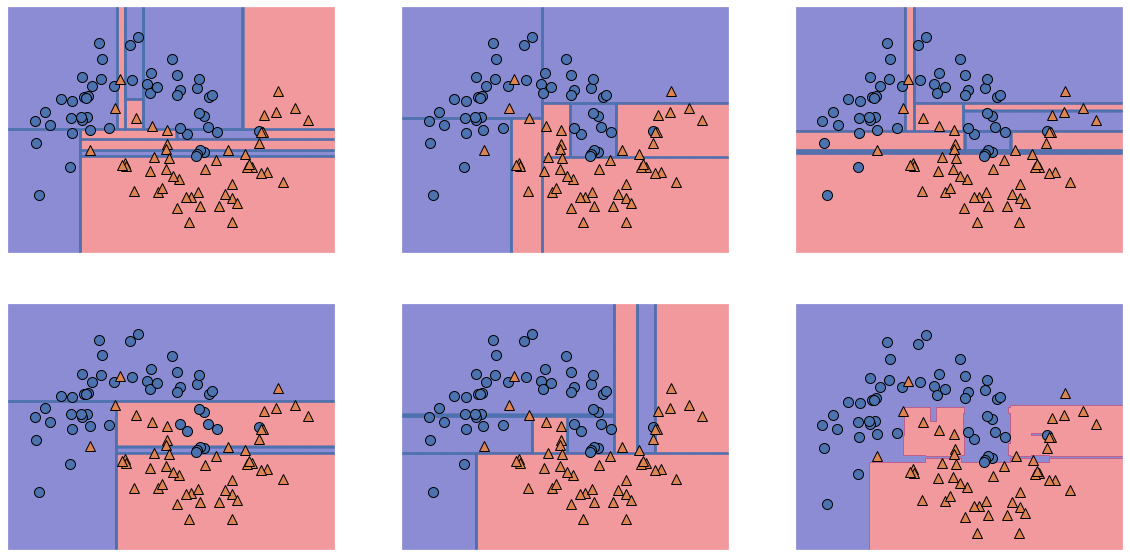

In [126]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for tree, ax in zip(model.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X_train, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- n_estimator=100으로 설정한 경우

In [142]:
# BaggingClassifier 모델 학습
# n_estimator=100으로 설정한 경우
model = BaggingClassifier( base_estimator= DecisionTreeClassifier(splitter='random'), 
                          oob_score=True, n_estimators=100, max_features=2,
                          random_state=0, max_samples=0.5)
model.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
model.score(X_train, y_train), model.score(X_test, y_test), model.oob_score_

(0.9733333333333334, 0.88, 0.9066666666666666)

- 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부스트랩 샘플의 크기를 지정할 수 있음
- 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

# Extra Tree

- 랜덤포레스트와 비슷하지만 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할을 선택
- 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree) 또는 줄여서 엑스트라 트리(extra-tree)라고 부름

- 부스트랩 샘플링은 적용하지 않음

- 예측방식은 랜덤포래스트와 동일하게 각 트리가 만든 확률값을 평균

In [143]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.84)

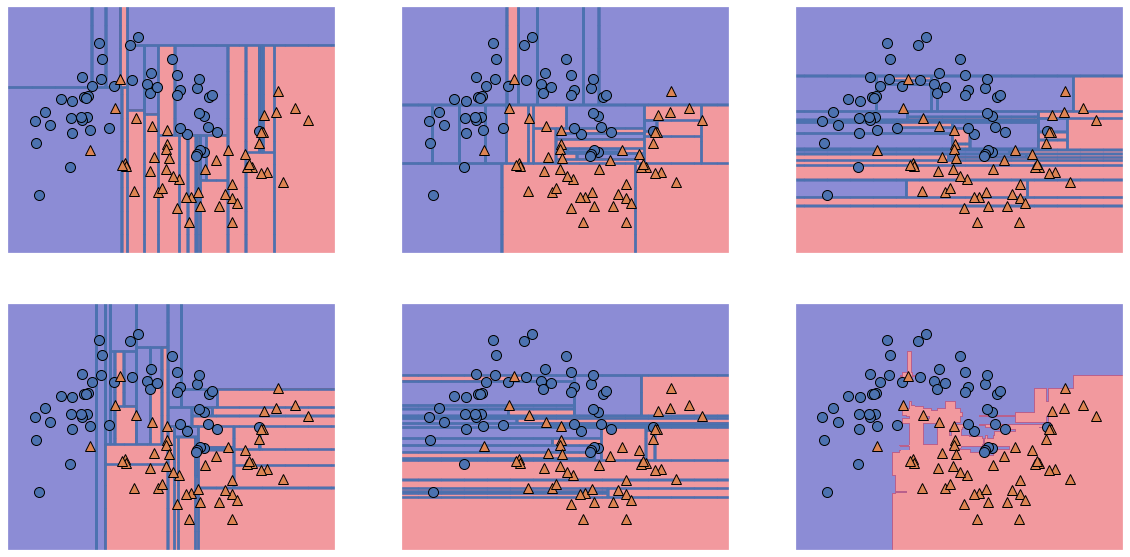

In [144]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for tree, ax in zip(model.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)


# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### Extra Tree 실습 01

n_estimator=100으로 설정한 경우 (유방암 데이터 세트에 적용)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [152]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=300, max_features =30,
                             max_depth=6, random_state = 0)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9953051643192489, 0.986013986013986)

- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄

- 엑스트라 트리는 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리가 필요하다는 문제

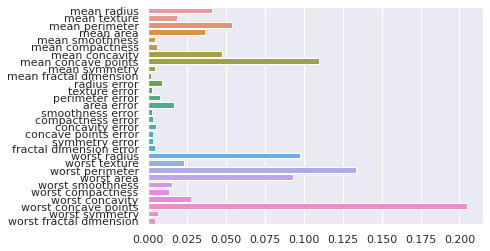

In [153]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x = model.feature_importances_, y = cancer.feature_names)